In [19]:
import numpy as np
import os
import random
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow import keras
from utils import *

In [2]:
os.environ["PYTHONHASHSEED"] = "0"
random.seed(1234)
np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
folder_path = './points'

x, y = read_data(folder_path)

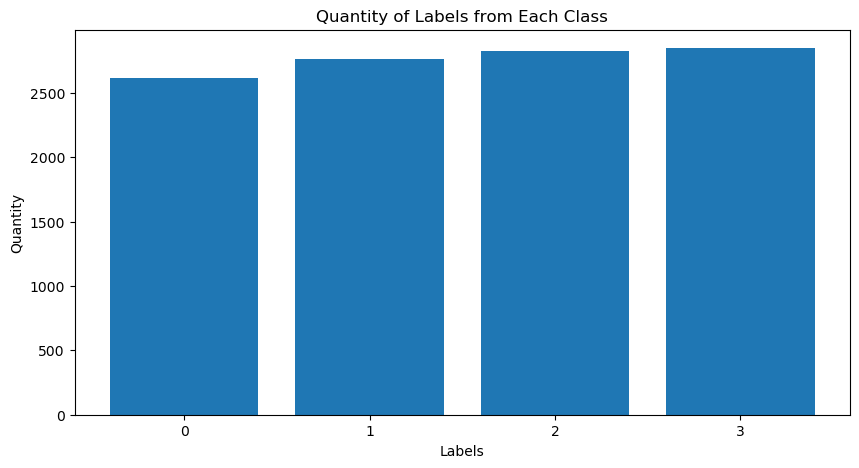

[0 1 2 3]
4


In [4]:
draw_bar_chart(y)

print(np.unique(y))

n_classes = len(np.unique(y))

print(n_classes)

In [5]:
# shuffle
x, y = shuffle(x, y, random_state=0)

# split
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=1/5, random_state=0, stratify=y)

x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=1/4, random_state=0, stratify=y_temp, shuffle=True)

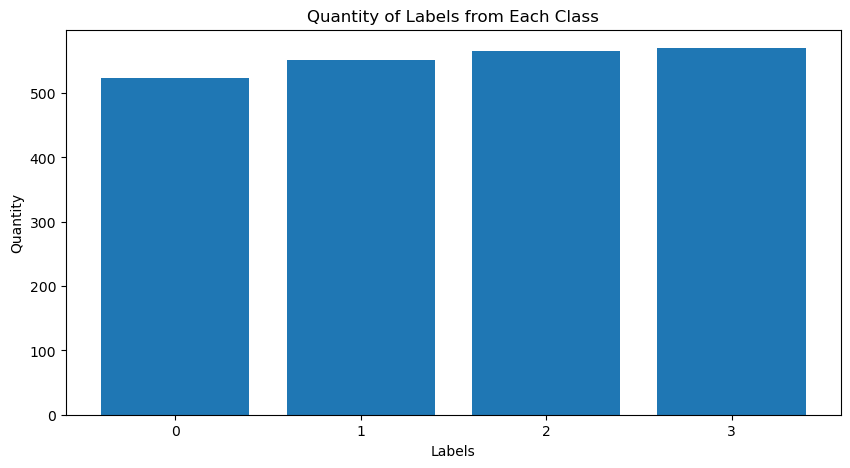

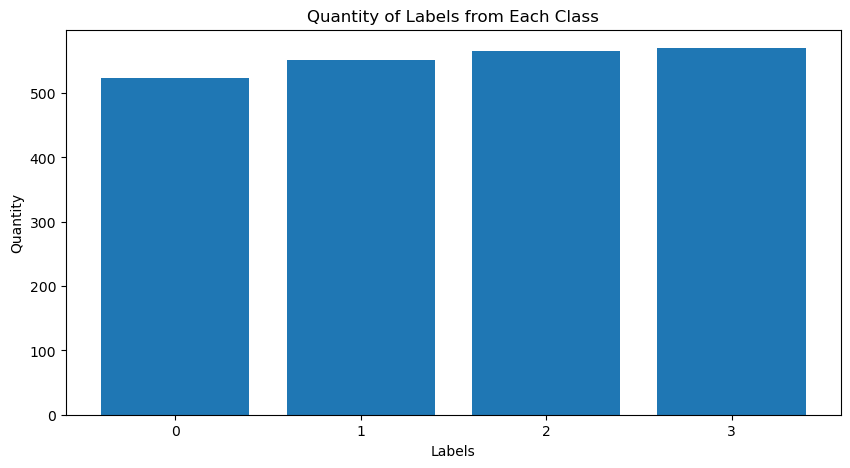

In [6]:
draw_bar_chart(y_val)
draw_bar_chart(y_test)

In [7]:
def create_model(input_shape, dropout=0.5, learning_rate=0.001, kernel_size=3, num_conv_layers=2):
   # Create a `Sequential` model and add a Dense layer as the first layer.
   model = tf.keras.models.Sequential()
   model.add(tf.keras.Input(shape=input_shape))
   for _ in range(num_conv_layers):
      model.add(tf.keras.layers.Conv1D(64, kernel_size, activation='relu'))
   #model.add(tf.keras.layers.MaxPooling1D(2,1))
   model.add(tf.keras.layers.Flatten())
   model.add(tf.keras.layers.Dropout(dropout))
   model.add(tf.keras.layers.Dense(128, activation='relu'))
   model.add(tf.keras.layers.Dropout(dropout))
   model.add(tf.keras.layers.Dense(32, activation='relu'))
   model.add(tf.keras.layers.Dense(n_classes, activation="softmax"))

   model.compile(
      loss="sparse_categorical_crossentropy",
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=["sparse_categorical_accuracy"]
   )
   return model

In [8]:
input_shape = x.shape[1:]

model = create_model(input_shape)

model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

results = model.fit(
    x_train,
    y_train,
    validation_data=(x_val,y_val),
    epochs=10000,
    batch_size=128,
    callbacks=callbacks,
)

model.evaluate(x_val, y_val, verbose=1)

model.evaluate(x_test, y_test, verbose=1)

2023-07-04 14:02:24.775593: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-04 14:02:24.963981: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-04 14:02:24.965192: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 64)            640       
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            12352     
                                                                 
 flatten (Flatten)           (None, 1088)              0         
                                                                 
 dropout (Dropout)           (None, 1088)              0         
                                                                 
 dense (Dense)               (None, 128)               139392    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4

2023-07-04 14:02:36.810470: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-07-04 14:02:38.687540: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fc2f40136d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-04 14:02:38.687680: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 960M, Compute Capability 5.0
2023-07-04 14:02:39.316698: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-04 14:02:41.822471: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


52/52 [==============================] - 12s 21ms/step - loss: 1.3470 - sparse_categorical_accuracy: 0.3280 - val_loss: 1.2813 - val_sparse_categorical_accuracy: 0.3894
Epoch 2/10000
52/52 [==============================] - 0s 6ms/step - loss: 1.2511 - sparse_categorical_accuracy: 0.4159 - val_loss: 1.1808 - val_sparse_categorical_accuracy: 0.4708
Epoch 3/10000
52/52 [==============================] - 0s 5ms/step - loss: 1.1316 - sparse_categorical_accuracy: 0.5077 - val_loss: 1.0278 - val_sparse_categorical_accuracy: 0.5857
Epoch 4/10000
52/52 [==============================] - 0s 5ms/step - loss: 1.0285 - sparse_categorical_accuracy: 0.5648 - val_loss: 0.9440 - val_sparse_categorical_accuracy: 0.6079
Epoch 5/10000
52/52 [==============================] - 0s 5ms/step - loss: 0.9511 - sparse_categorical_accuracy: 0.6105 - val_loss: 0.8642 - val_sparse_categorical_accuracy: 0.6536
Epoch 6/10000
52/52 [==============================] - 0s 5ms/step - loss: 0.8893 - sparse_categorical_accu

[0.248493492603302, 0.9172320365905762]

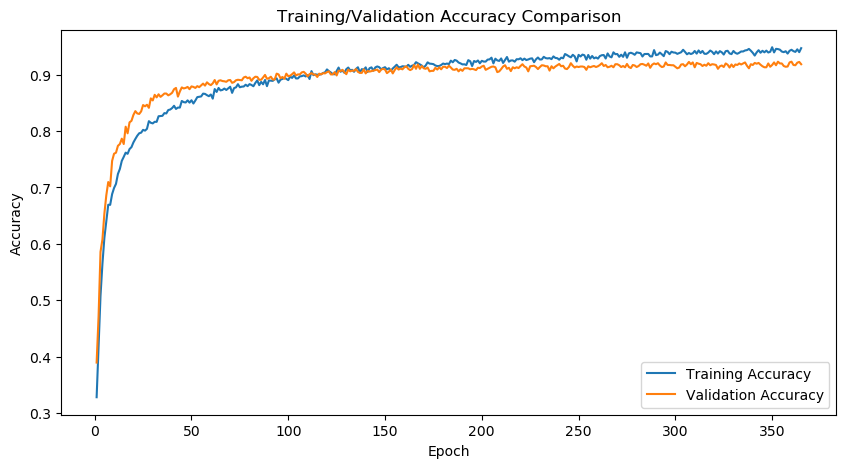

In [9]:
plot_accuracy_comparison([results.history["sparse_categorical_accuracy"], results.history["val_sparse_categorical_accuracy"]],
                        "Training/Validation Accuracy Comparison",
                        ["Training Accuracy", "Validation Accuracy"])

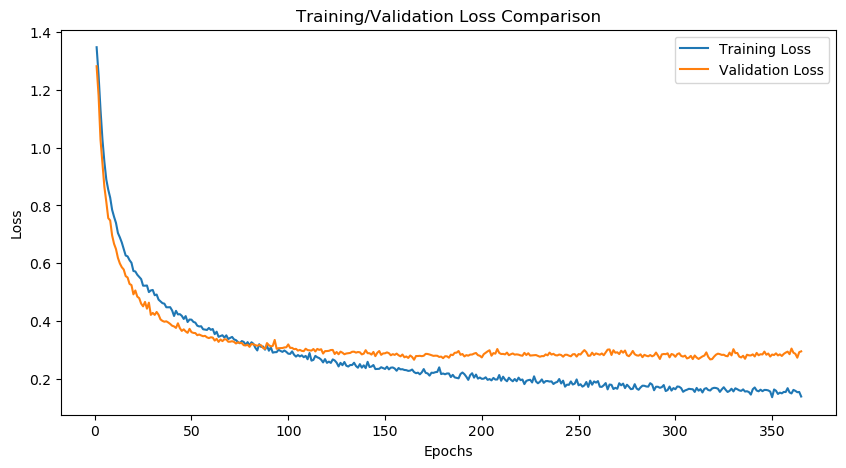

In [10]:
plot_loss_comparison([results.history["loss"], results.history["val_loss"]],
                     "Training/Validation Loss Comparison",
                     ["Training Loss", "Validation Loss"])

70/70 [==============================] - 0s 2ms/step
<class 'str'>


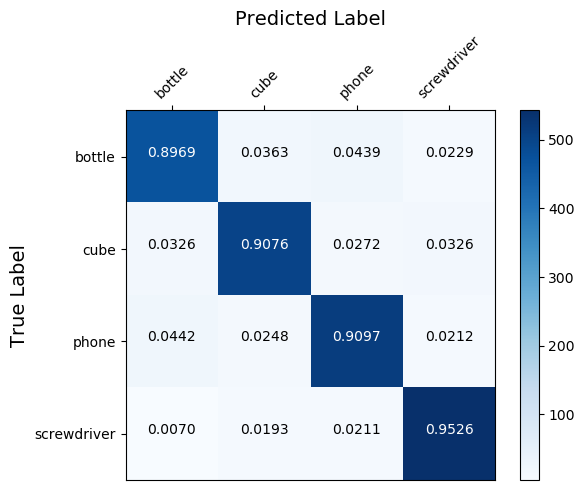

In [21]:
y_pred=np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_pred,y_test))
plot_confusion_matrix(y_test, y_pred, ["bottle", "cube", "phone", "screwdriver"])

In [12]:
# dropouts=[0.1 * _ for _ in range(6)]
# acc = []
# loss = []

# for d in dropouts:
#     model = fc_model(dropout=d)

#     model.compile(
#         loss="sparse_categorical_crossentropy",
#         optimizer=keras.optimizers.Adam(learning_rate=1e-4),
#         metrics=["sparse_categorical_accuracy"]
#     )

#     callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

#     results = model.fit(
#         x_train,
#         y_train,
#         validation_data=(x_val,y_val),
#         #validation_split=0.2,
#         epochs=100,
#         batch_size=16,
#         callbacks=callbacks,
#     )

#     acc.append(results.history["val_sparse_categorical_accuracy"])
#     loss.append(results.history["val_loss"])

In [13]:
# plot_accuracy_comparison(acc, "Dropout Comparison (Validation Accuracy)", dropouts)


In [14]:
# plot_loss_comparison(loss, "Dropout Comparison (Validation Loss)", dropouts)

In [15]:
# #a = np.array([0,1,0,0,1,0,0,1,0,0])
# #a = np.array([1,1,0,1,1,0,1,1,0,1])
# #a = np.array([2,2,0,2,2,1,2,2,3,2])
# a = np.array([7,7,0,7,7,3,7,7,6,7])

# a = a.reshape((1, a.shape[0],1))

# print(a.shape)

# model.predict(a)

In [16]:
# model.save('../models/points_conv_1d')

In [17]:
#model = tf.keras.models.load_model('../models/transformer_numbers')